# <center> Prevendo emissão de CO2 </center>

**Exemplo de modelo de Regressão Linear simples**

Dataset disponibilizado pela plataforma CognitiveClass da IBM pelo curso de Machine Learning with Python

In [0]:
#Importando pacotes

import numpy as np
import pandas as pd
import pylab as lb
import matplotlib.pyplot as plt
%matplotlib inline

### **Baixando dados**

In [7]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-02-28 02:01:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-02-28 02:01:36 (1.61 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



**Lendo os dados to arquivo**

In [8]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Explorando os dados**

In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


**Visualizando os dados**

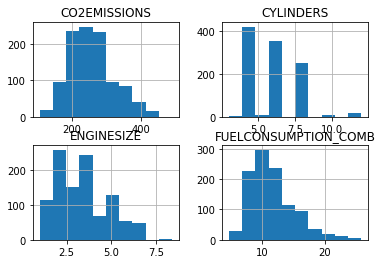

In [12]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

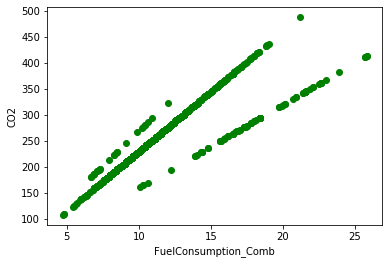

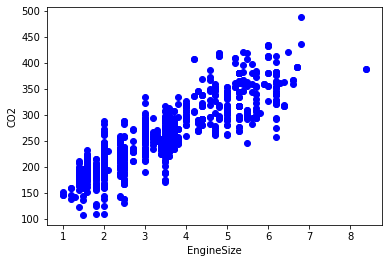

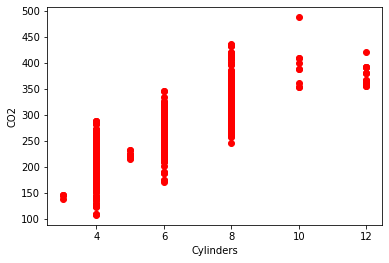

In [17]:
#Comparando essas variaveis com a Emissao de CO2 pra entender suas relações

plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='green')
plt.xlabel("FuelConsumption_Comb")
plt.ylabel("CO2")
plt.show()

plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
plt.xlabel("EngineSize")
plt.ylabel("CO2")
plt.show()

plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='red')
plt.xlabel("Cylinders")
plt.ylabel("CO2")
plt.show()

**Dividindo dados de treino e teste**

In [0]:
msk = np.random.rand(len(df)) < 0.8
treino = cdf[msk]
teste = cdf[~msk]

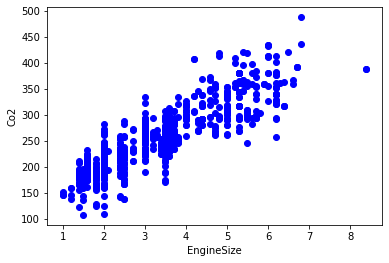

In [23]:
#Distribuicao dos dados de treino
plt.scatter(treino.ENGINESIZE,treino.CO2EMISSIONS,color='blue')
plt.xlabel("EngineSize")
plt.ylabel("Co2")
plt.show()

**Treinando o modelo**

In [24]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

treino_x = np.asanyarray(treino[['ENGINESIZE']])
treino_y = np.asanyarray(treino[['CO2EMISSIONS']])

reg.fit(treino_x,treino_y)

# θ0 e θ1

print('Coeficiente: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coeficiente:  [[38.9966287]]
Intercept:  [125.51799177]


**Visualizando resultado**

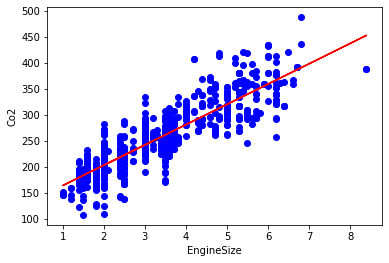

In [29]:
plt.scatter(treino.ENGINESIZE, treino.CO2EMISSIONS, color = 'blue')
plt.plot(treino_x,reg.coef_[0][0]*treino_x + reg.intercept_[0], '-r') #Linha ajustada com os parametros slope e intercept calculados para cada ponto
plt.xlabel("EngineSize")
plt.ylabel("Co2")
plt.show()

In [33]:
#Comparando acuracidade do modelo com os valores de teste e os valores reais
#Para este exemplo, vamos usar MSE como métrica para calculo das médias dos erros

from sklearn.metrics import r2_score

teste_x = np.asanyarray(teste[['ENGINESIZE']])
teste_y = np.asanyarray(teste[['CO2EMISSIONS']])

teste_y2 = reg.predict(teste_x)

print("Media absoluta de erros: %.2f" % np.mean(np.absolute(teste_y2 - teste_y)))
print("Soma residual (MSE): %.2f" % np.mean((teste_y2 - teste_y)**2))
print("R2-score: %.2f" % r2_score(teste_y2, teste_y) )

Media absoluta de erros: 22.52
Soma residual (MSE): 949.82
R2-score: 0.67
